<a href="https://colab.research.google.com/github/KedarM108/Data-Science-/blob/main/practical5_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt

In [38]:
df=pd.read_csv("https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv")

In [39]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [40]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [41]:
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.25,random_state=0)

In [42]:
scl=StandardScaler()
X_train=scl.fit_transform(X_train)
X_test=scl.transform(X_test)

In [43]:
clf=LogisticRegression(random_state=0)
clf.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [44]:
pred = clf.predict(X_test)

In [51]:
cm=confusion_matrix(y_test,pred)
print("Confusion Matrix:",cm)

accuracy=accuracy_score(y_test,pred)
print("Accuracy Score:",accuracy)

error_rate=1-accuracy
print("Error rate:",error_rate)

precision = precision_score(y_test, pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test, pred)
print("Recall:", recall)

# Compute F1 score
f1 = f1_score(y_test, pred)
print("F1 Score:", f1)

Confusion Matrix: [[65  3]
 [ 8 24]]
Accuracy Score: 0.89
Error rate: 0.10999999999999999
Precision: 0.8888888888888888
Recall: 0.75
F1 Score: 0.8135593220338982


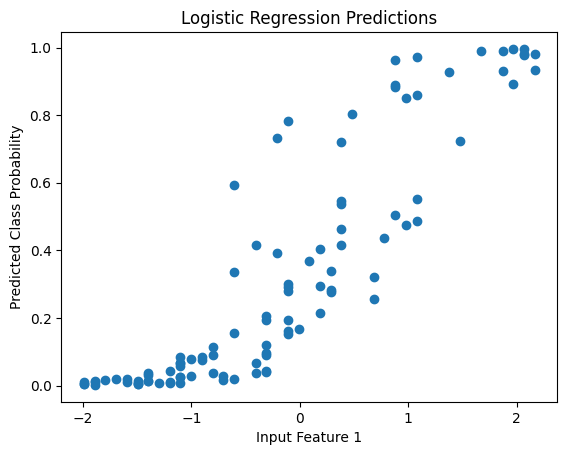

In [54]:
pred_prob = clf.predict_proba(X_test)[:, 1]

# Plot a scatter plot of the input feature(s) versus the predicted probabilities
plt.scatter(X_test[:, 0], pred_prob)
plt.xlabel('Input Feature 1')
plt.ylabel('Predicted Class Probability')
plt.title('Logistic Regression Predictions')
plt.show()